# Assignment: Exploratory Data Analysis
## Do two. You might want to refer to your work for the data wrangling assignment.

In [77]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [3]:
dfc = pd.read_csv('data/college_completion.csv',low_memory=False) # read in CSV

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [14]:
print('dimensions:',dfc.shape)
print('num observations:',dfc.shape[0])
print('num variables:',dfc.shape[1])
print('variables:',dfc.columns.values) # we know there are 63 bc that's how many columns, so decent list
dfc.head() # there's a lot hidden, too

dimensions: (3798, 63)
num observations: 3798
num variables: 63
variables: ['index' 'unitid' 'chronname' 'city' 'state' 'level' 'control' 'basic'
 'hbcu' 'flagship' 'long_x' 'lat_y' 'site' 'student_count'
 'awards_per_value' 'awards_per_state_value' 'awards_per_natl_value'
 'exp_award_value' 'exp_award_state_value' 'exp_award_natl_value'
 'exp_award_percentile' 'ft_pct' 'fte_value' 'fte_percentile'
 'med_sat_value' 'med_sat_percentile' 'aid_value' 'aid_percentile'
 'endow_value' 'endow_percentile' 'grad_100_value' 'grad_100_percentile'
 'grad_150_value' 'grad_150_percentile' 'pell_value' 'pell_percentile'
 'retain_value' 'retain_percentile' 'ft_fac_value' 'ft_fac_percentile'
 'vsa_year' 'vsa_grad_after4_first' 'vsa_grad_elsewhere_after4_first'
 'vsa_enroll_after4_first' 'vsa_enroll_elsewhere_after4_first'
 'vsa_grad_after6_first' 'vsa_grad_elsewhere_after6_first'
 'vsa_enroll_after6_first' 'vsa_enroll_elsewhere_after6_first'
 'vsa_grad_after4_transfer' 'vsa_grad_elsewhere_after4_transf

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see.

In [16]:
pd.crosstab(dfc['control'], dfc['level'])
# most students go to 4 year universities
# students who go to public are more likely to go to 2-year than 4-year
# 1707 4-yr private (combining for-profit and not-for-profit) students vs 533 in 2-yr private programs
# of 2-yr students, most go to a public university

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

<Axes: xlabel='grad_100_value', ylabel='Count'>

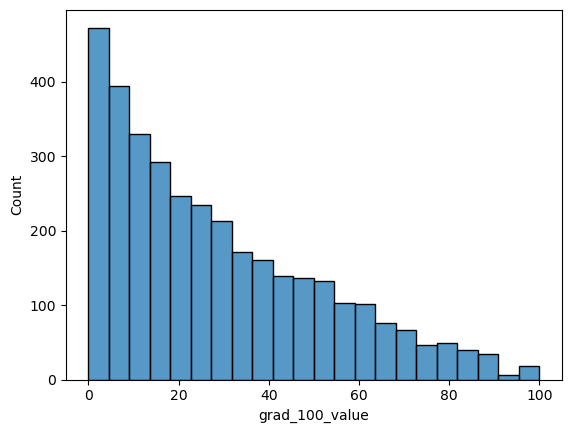

In [26]:
sns.histplot(data=dfc['grad_100_value']) # basic histogram with auto-bins/bin-size

<Axes: xlabel='grad_100_value', ylabel='Density'>

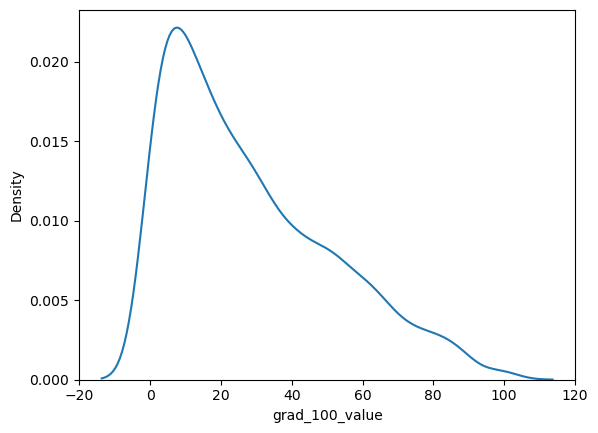

In [27]:
sns.kdeplot(data=dfc['grad_100_value']) # basic kernel density plot

<Axes: >

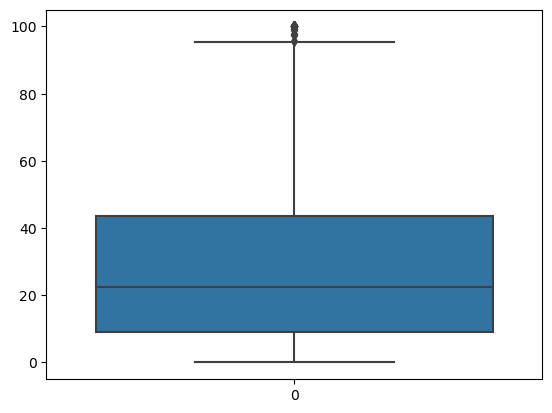

In [33]:
sns.boxplot(data=dfc['grad_100_value']) # interestingly, there are a couple outlier at the very top (near 100%); 75% of data is below 91%

In [31]:
# description of the grad_100_value column
dfc['grad_100_value'].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

<Axes: xlabel='grad_100_value', ylabel='Density'>

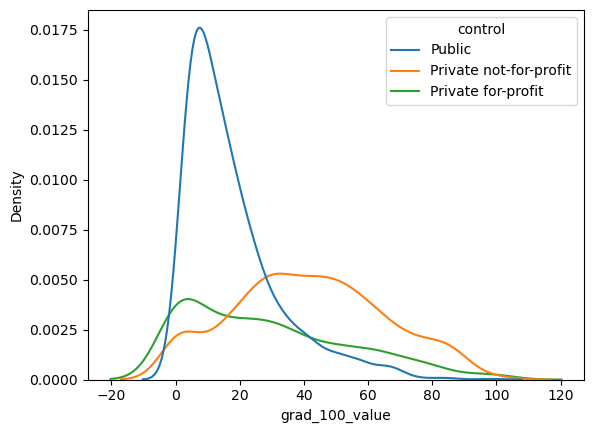

In [42]:
# By control:
# public universities are heavily concentrated between 0-20% of students who graduate in the expected time - surprisingly low
#   means its very common for public schools to have low completion in expected time rates
# private, for profit is also relatively bunched low, seemingly about half of those schools have 40-50% or lower completion rates in expected time
#   even a decent number which seem to have extremely low (e.g. 5-10% or lower)
# private for profit does the best - there are certainly some schools which do not do great, but its far more consistent throughout
#   this is the one which looks most like the bell curve I would expect
sns.kdeplot(data=dfc, x='grad_100_value', hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

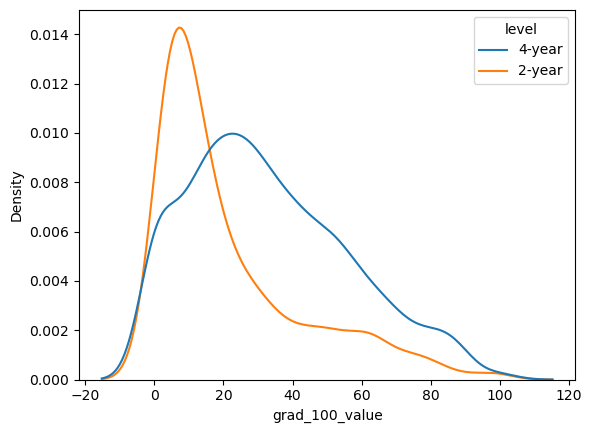

In [43]:
# By level:
# 4 year programs have far better completion rates than 2-year programs
#   for higher rates, there are more 4-yr programs with that rate than 2-yr programs with it
# a lot of 2-yr schools have 0-10% compeletion rates, but there are a decent number of other ones with moderate ones, too
sns.kdeplot(data=dfc, x='grad_100_value', hue='level')

In [51]:
dfc.loc[:,['grad_100_value','control']].groupby('control').describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [52]:
dfc.loc[:,['grad_100_value','level']].groupby('level').describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [53]:
# 4 year schools tend to have the best completion rate by level (mean, 50%, 75%, etc)
#   Average is 12% more, and more than 50% of them do better than that average, as opposed to the fact 50% of 2-yr schools
#   have a completion rate below 13%
# private not for profit tend to have the best completion rate by control (all same metrics)
#   interestingly, 25% of their schools have under 25% completion rates (worst in that metric), but their mean is by far the highest
#   and they also have the highest 50% and 75% thresholds by a long way

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

<Axes: xlabel='grad_100_value', ylabel='Density'>

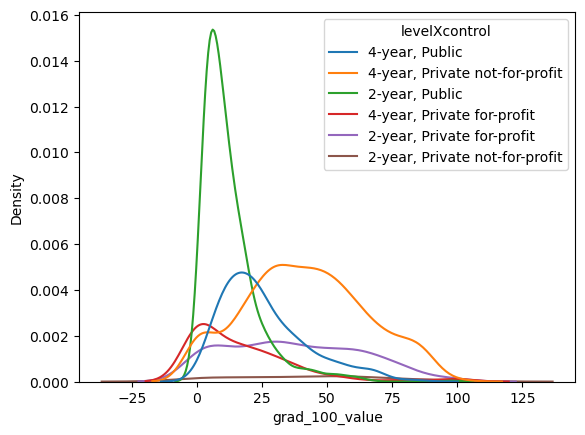

In [56]:
dfc['levelXcontrol'] = dfc['level']+', '+dfc['control']
sns.kdeplot(dfc, x='grad_100_value', hue='levelXcontrol')
# 4 year private not for profit appears to have best, it has the highest density towards the max values

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

<Axes: xlabel='aid_value', ylabel='Density'>

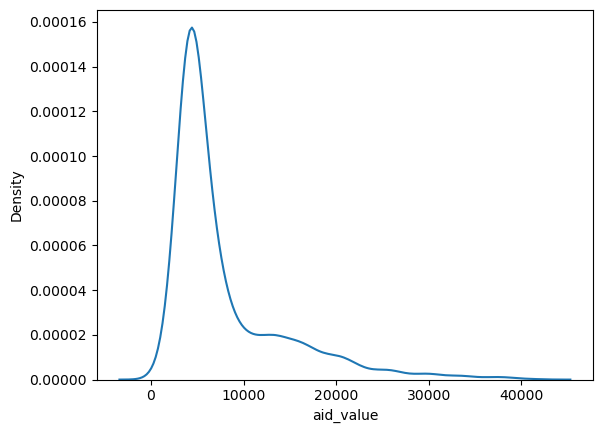

In [58]:
sns.kdeplot(data=dfc, x='aid_value') 
# ungrouped - most students have less than 10k in aid, and of those a lot get around the 5k amount
# there is another bit of a bump near 15k, but then drops off at ~18k, and again at ~22k
# almost all students have less than 25k in aid

<Axes: xlabel='aid_value', ylabel='Density'>

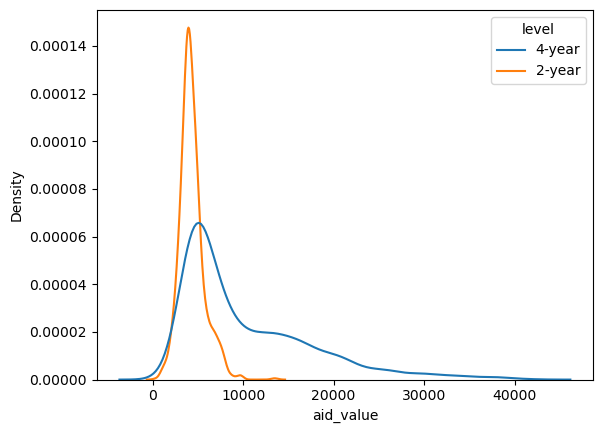

In [59]:
sns.kdeplot(data=dfc, x='aid_value', hue='level') 
# 4-yr programs tend to have students receiving larger aid packages
# makes sense bc 4 > 2, and unclear if by year or total; also price is unclear in the first place
# no 2-yr programs have students w more than 15k of aid, but plenty of 4-yr ones go up to ~48k (including boarding?)

<Axes: xlabel='aid_value', ylabel='Density'>

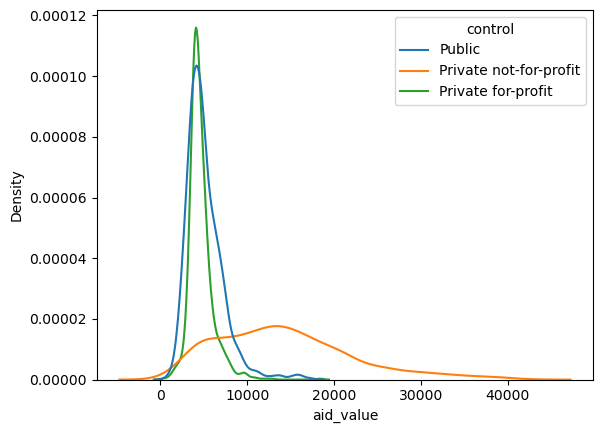

In [61]:
sns.kdeplot(data=dfc, x='aid_value', hue='control') 
# public and private-for-profit are nearly identical in amounts of aid given out and how many by school
# private not for profit has the most schools giving out the most
# makes sense:
#    a) larger endowments than public, so physically have more money
#    b) sticker price is more expensive than public, so more subsidy goes further
#    c) for-profit wouldn't give out much aid... they're for profit

In [63]:
dfc.loc[:,['aid_value','level']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [64]:
dfc.loc[:,['aid_value','control']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [65]:
# calculations confirm private not for profit generally has best aid value by control and 4-yr programs generally have best by level
#   25% of private not for profit schools on average give out larger aid packages than the largest by a private for profit or public school
#   same goes for 4-yr compared to 2-yr

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

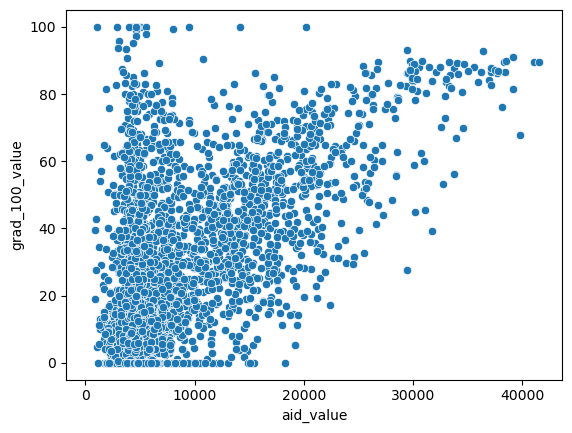

In [67]:
sns.scatterplot(data=dfc, x='aid_value', y='grad_100_value')
# pretty overwhelming, a lot of datapoints, most schools have < 15k packages and lots of variation among grad rates
# but as average packaged get larger past that giant clump, average completion rates do go up
# it's a top-heavy graph

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

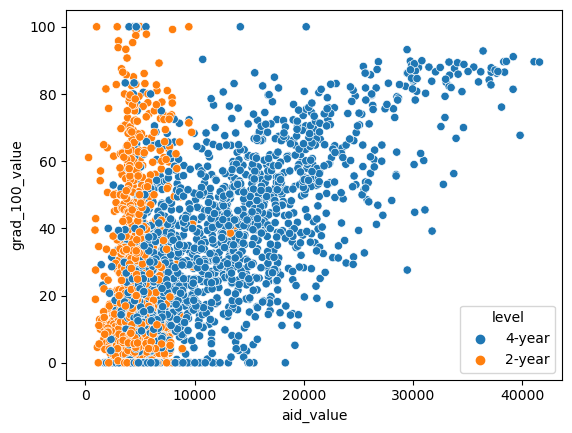

In [70]:
sns.scatterplot(data=dfc, x='aid_value', y='grad_100_value', hue='level')
# doesn't seem to be a huge impact on completion rate by aid value for 2-year programs
# the graph is still top-heavy, so it seems like there is an connection in 4-yr programs which have students receiving more aid

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

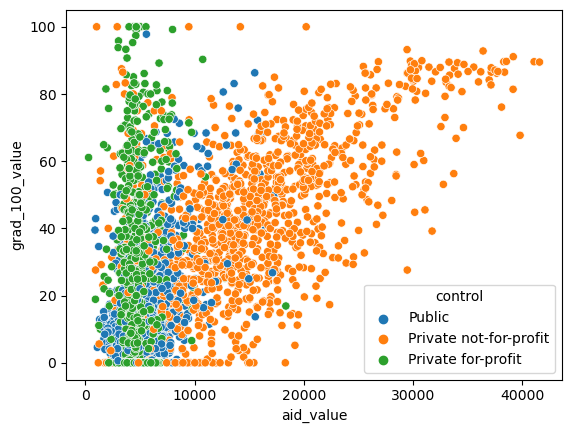

In [71]:
sns.scatterplot(data=dfc, x='aid_value', y='grad_100_value', hue='control')
# private for-profit doesn't really have an impact - all clumped vertically
# it's hard to see for public because there are so many schools with so little, but also many public schools with lower grad rates and
#       hard to come to complete conclusion
# private not-for-profit it does seem to have an impact, there's more of a trend that more aid correlates to higher grat rate in expected time

In [72]:
# Note I put my conclusions in comments for each graph, but private-not-for-profit and 4-year schools seem to have the best connection b/w
#   grad rate and aid

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.

In [5]:
dfa = pd.read_csv('data/airbnb_hw.csv',low_memory=False) # read in CSV
dfa['Price'] = dfa['Price'].str.replace(',','') # remove commas
dfa['Price'] = pd.to_numeric(dfa['Price'], errors='coerce') # convert from strings to numbers


  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [73]:
print('dimensions:',dfa.shape)
print('num observations:',dfa.shape[0])
print('num variables:',dfa.shape[1])
print('variables:',dfa.columns.values) # we know there are 63 bc that's how many columns, so decent list
dfa.head() # there's a lot hidden, too

dimensions: (30478, 13)
num observations: 30478
num variables: 13
variables: ['Host Id' 'Host Since' 'Name' 'Neighbourhood ' 'Property Type'
 'Review Scores Rating (bin)' 'Room Type' 'Zipcode' 'Beds'
 'Number of Records' 'Number Of Reviews' 'Price' 'Review Scores Rating']


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [75]:
pd.crosstab(dfa['Property Type'], dfa['Room Type'])
# did it opposite direction to fit better :)
# private rooms more popular than entire home in B&B, castle, chalet (?), dorm, house, hut, treehouse, and 'other'
# overall, apartment, B&B, house, condo, loft, and townhouse are most common, there's a bunch of random ones
# shared room is only most common in treehouses
# 11 of the 19 property types only have a single digit number of properties listed (for 42 total of the almost 30.5k properties)


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

<Axes: xlabel='Price'>

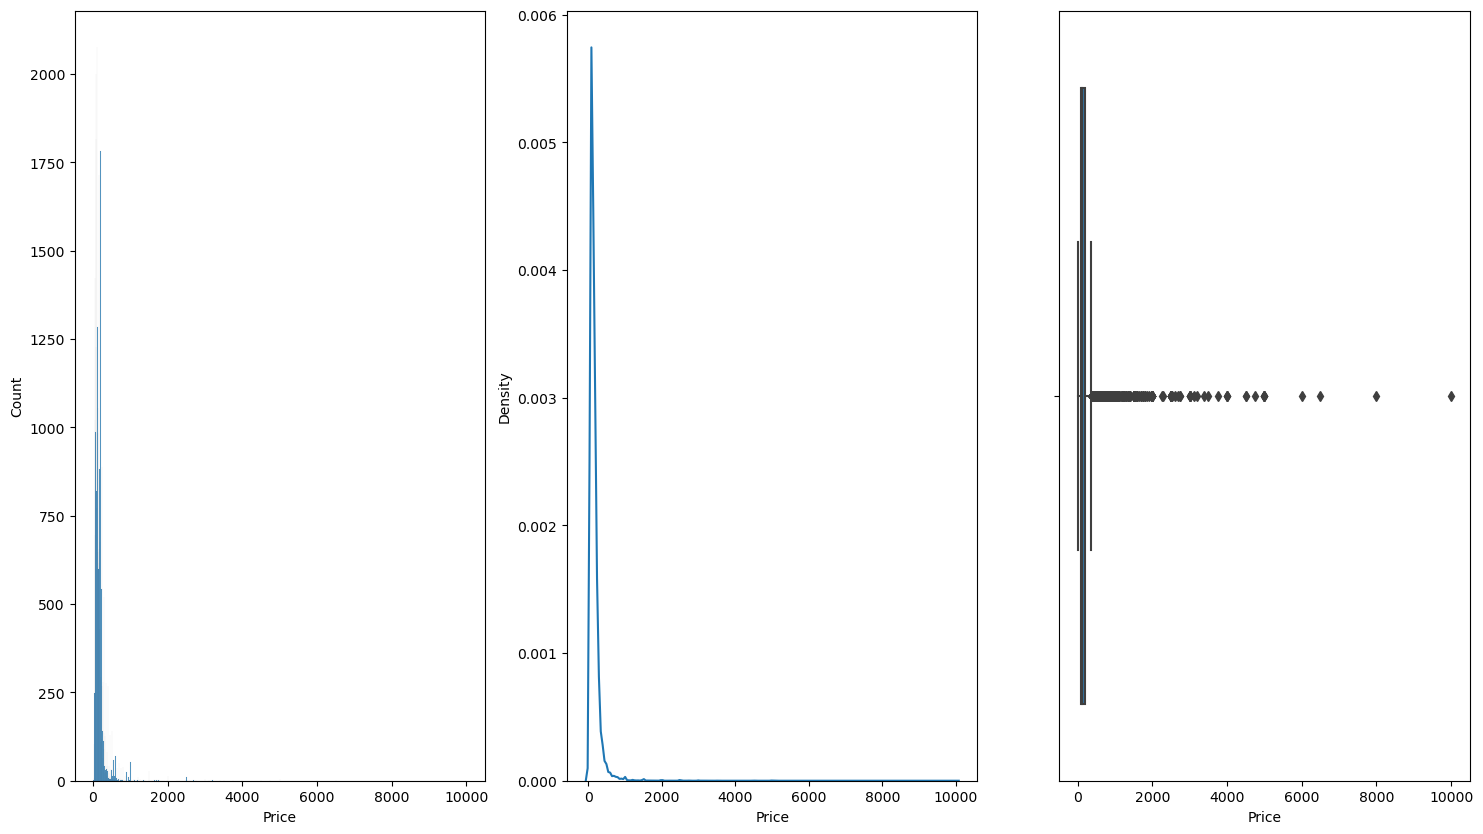

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

sns.histplot(ax=axes[0], data=dfa, x='Price')
sns.kdeplot(ax=axes[1], data=dfa, x='Price')
sns.boxplot(ax=axes[2], data=dfa, x='Price')
# source for grid: https://www.geeksforgeeks.org/multi-plot-grid-in-seaborn/

In [92]:
dfa['Price'].describe()

# yeah... not greatly scaled...

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

<Axes: xlabel='price_log'>

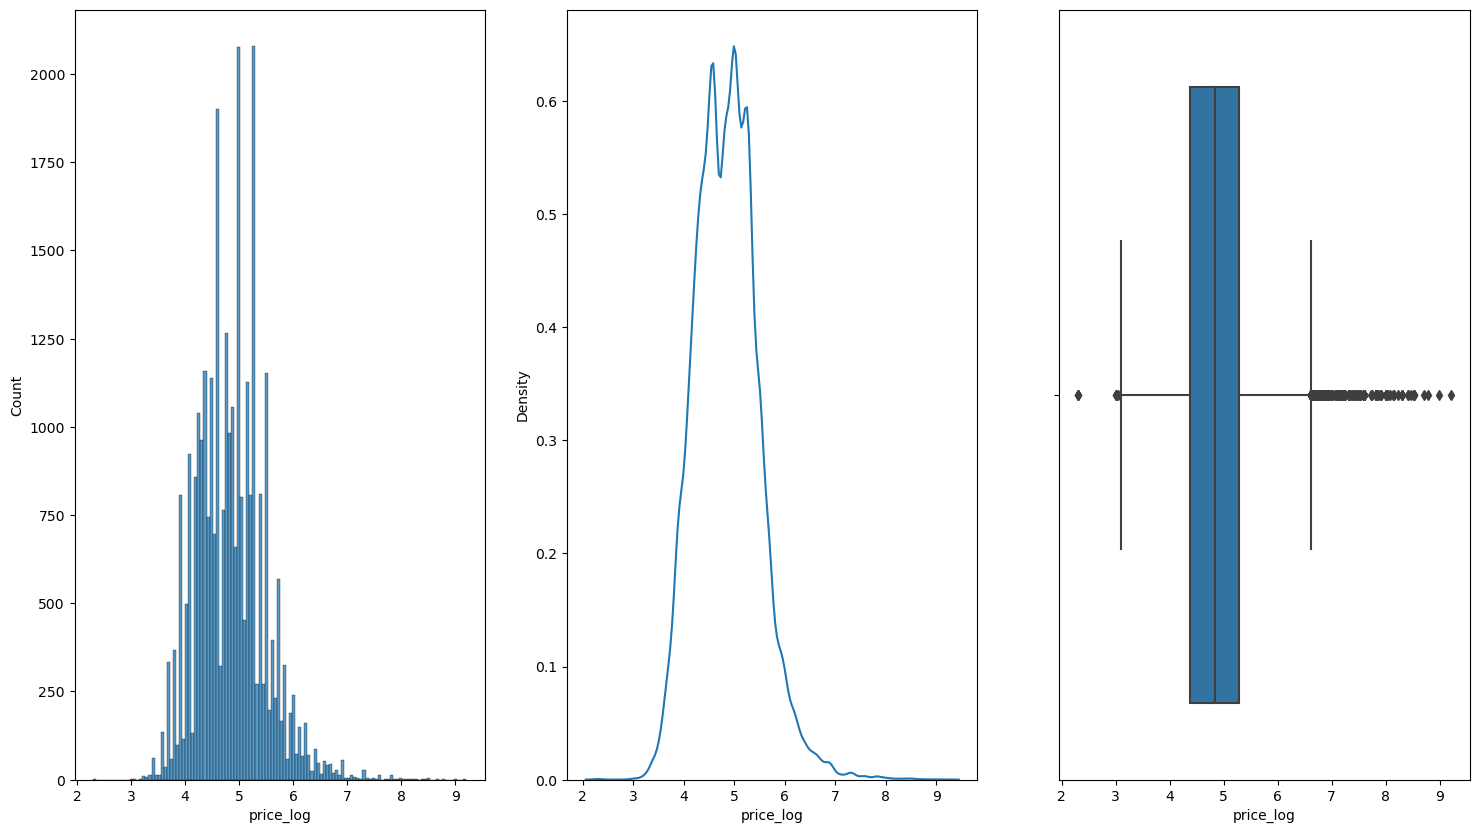

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

dfa['price_log'] = np.log(dfa['Price'])

sns.histplot(ax=axes[0], data=dfa, x='price_log')
sns.kdeplot(ax=axes[1], data=dfa, x='price_log')
sns.boxplot(ax=axes[2], data=dfa, x='price_log')

In [95]:
dfa['price_log'].describe()

# that's a lot better!

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='price_log'>

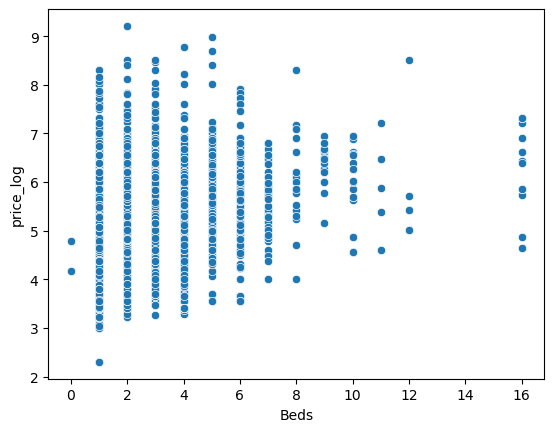

In [98]:
sns.scatterplot(data=dfa, x='Beds', y='price_log')
# extremes seem to be narrowing in - a lot of beds is pretty much in the middle, few/many beds could range from very expensive to very cheap

In [99]:
dfa.loc[:,['Beds', 'price_log']].groupby('Beds').describe()
# number of listings goes down as you filter by beds (and somehow there are 2 for 0 beds?)
# mean price goes up with more beds, max stays kinda constance, min goes up and then kinda constant

price_log                                                              \
         count      mean       std       min       25%       50%       75%   
Beds                                                                         
0.0        2.0  4.476755  0.427613  4.174387  4.325571  4.476755  4.627939   
1.0    20344.0  4.686977  0.539666  2.302585  4.317488  4.605170  5.043425   
2.0     6610.0  5.094504  0.580425  3.218876  4.744932  5.075174  5.416100   
3.0     2071.0  5.340837  0.644742  3.258097  4.941642  5.298317  5.703782   
4.0      783.0  5.480463  0.721360  3.295837  5.010635  5.509388  5.926926   
5.0      284.0  5.669484  0.735623  3.555348  5.245705  5.669881  6.109248   
6.0      177.0  5.651790  0.824358  3.555348  5.293305  5.616771  6.052089   
7.0       45.0  5.617009  0.693481  4.007333  5.176150  5.703782  6.098074   
8.0       24.0  5.956200  0.862418  4.007333  5.495121  5.857933  6.176138   
9.0       15.0  6.341645  0.461176  5.164786  6.098011  6.476972  6.636468   
10.0      16.0  5.945514  0.762220  4.553877  5.673034  6.009872  6.559853   
11.0       5.0  5.913390  0.996967  4.605170  5.393628  5.883322  6.476972   
12.0       4.0  6.161928  1.595714  5.010635  5.314734  5.559941  6.407135   
16.0      13.0  6.312746  0.877963  4.644391  5.857933  6.437752  6.907755   

                
           max  
Beds            
0.0   4.779123  
1.0   8.294050  
2.0   9.210340  
3.0   8.517193  
4.0   8.779557  
5.0   8.987197  
6.0   7.919356  
7.0   6.802395  
8.0   8.294050  
9.0   6.956545  
10.0  6.956545  
11.0  7.207860  
12.0  8.517193  
16.0  7.313220

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

<Axes: xlabel='Beds', ylabel='price_log'>

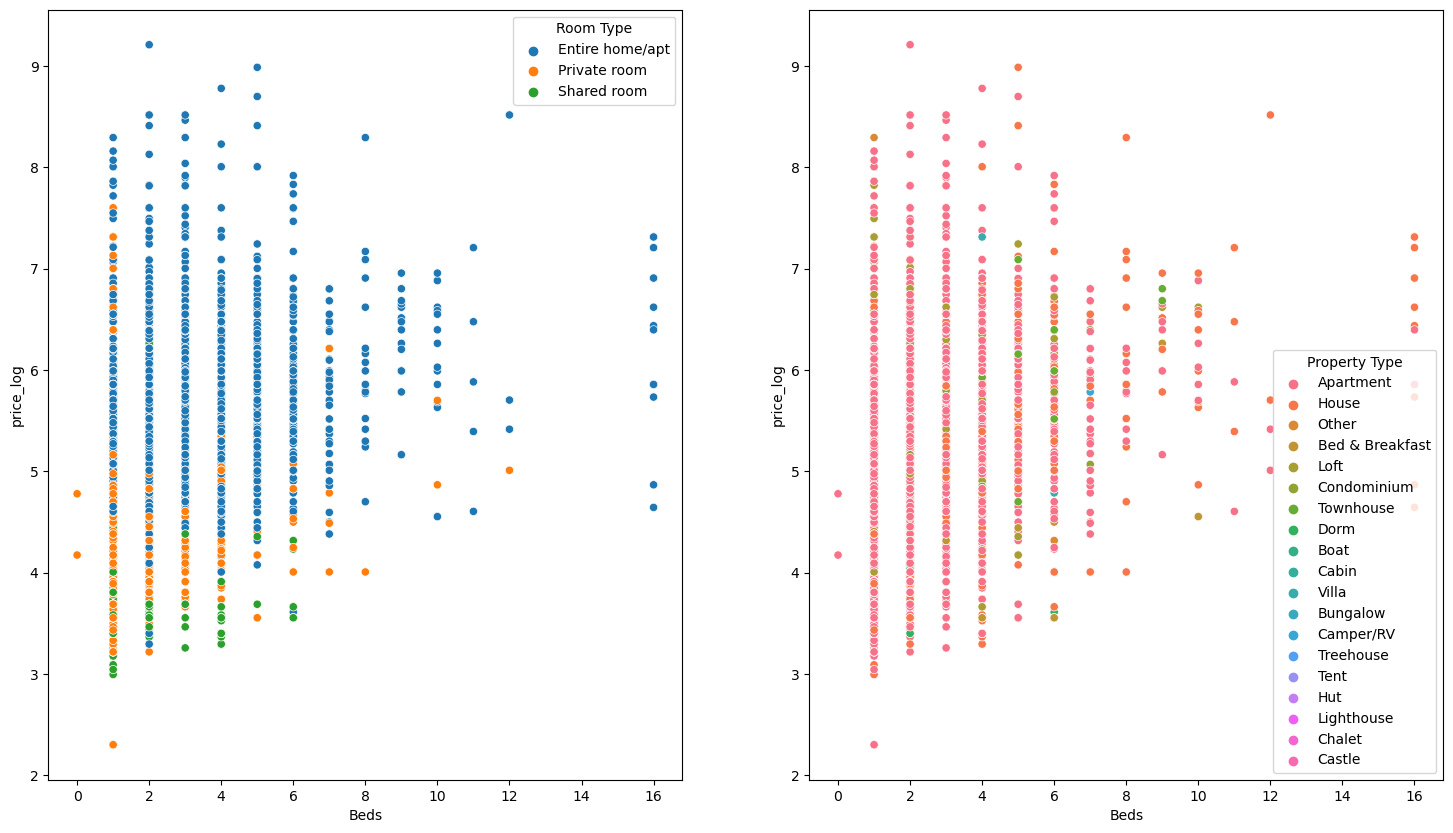

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.scatterplot(ax=axes[0], data=dfa, x='Beds', y='price_log', hue='Room Type')
sns.scatterplot(ax=axes[1], data=dfa, x='Beds', y='price_log', hue='Property Type')

# just a room tends to be cheaper than the house, irrespective of beds
# difficult to tell for by property type because it's overwhelmingly apartment and house, and those two are relatively evenly mixed
# entire house/apt is most expensive room type
# apartment/house tends to be the highest for property type, too

In [102]:
dfa.loc[:,['Price', 'Room Type']].groupby('Room Type').describe()
# highest average is entire-home/apt, but that's also the one with most variation. 
# That said, the top 75% of entire home/apt are less expensie than the bottom 75% of private or shared rooms


Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

In [104]:
dfa.loc[:,['Price', 'Property Type']].groupby('Property Type').describe()
# most expensive on average is 'other' but there's a ridiculous amount of variation, partly because it's vague and a small smaple size with extreme values
#       also has huge STD
# least expensive on average is... lighthouse... with 1 lighthouse (so no STD)...
# median is a better guesstimate as it eliminates the extremes better and highlights the values most toward the center of the pack

Price                                                \
                   count        mean         std    min     25%    50%   
Property Type                                                            
Apartment        27102.0  162.045642  181.376882   10.0   85.00  130.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50  160.5   
Cabin                2.0  165.000000  120.208153   80.0  122.50  165.0   
Camper/RV            7.0  103.571429  102.343958   39.0   47.00   49.0   
Castle               1.0  150.000000         NaN  150.0  150.00  150.0   
Chalet               1.0   99.000000         NaN   99.0   99.00   99.0   
Condominium         94.0  256.585106  249.357946   46.0  131.25  175.0   
Dorm                31.0   76.354839   42.424481   30.0   52.50   65.0   
House             2090.0  156.722967  307.116948   10.0   60.00   85.0   
Hut                  2.0   75.000000   35.355339   50.0   62.50   75.0   
Lighthouse           1.0   39.000000         NaN   39.0   39.00   39.0   
Loft               753.0  221.960159  271.958145   30.0   80.00  140.0   
Other               47.0  394.659574  696.663423   39.0   82.50  135.0   
Tent                 4.0  126.250000   94.989034   40.0   58.75  107.5   
Townhouse          136.0  203.933824  264.178901   45.0   89.50  135.0   
Treehouse            4.0  149.500000  100.520313   95.0   95.00  101.5   
Villa                8.0  328.000000  479.888975   60.0  107.50  187.5   

                                  
                    75%      max  
Property Type                     
Apartment        195.00  10000.0  
Bed & Breakfast  125.00    900.0  
Boat             178.50    250.0  
Bungalow         177.75    195.0  
Cabin            207.50    250.0  
Camper/RV        109.00    325.0  
Castle           150.00    150.0  
Chalet            99.00     99.0  
Condominium      298.75   1990.0  
Dorm              80.00    200.0  
House            150.00   8000.0  
Hut               87.50    100.0  
Lighthouse        39.00     39.0  
Loft             240.00   3000.0  
Other            378.00   4000.0  
Tent             175.00    250.0  
Townhouse        206.25   2500.0  
Treehouse        156.00    300.0  
Villa            224.75   1500.0

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

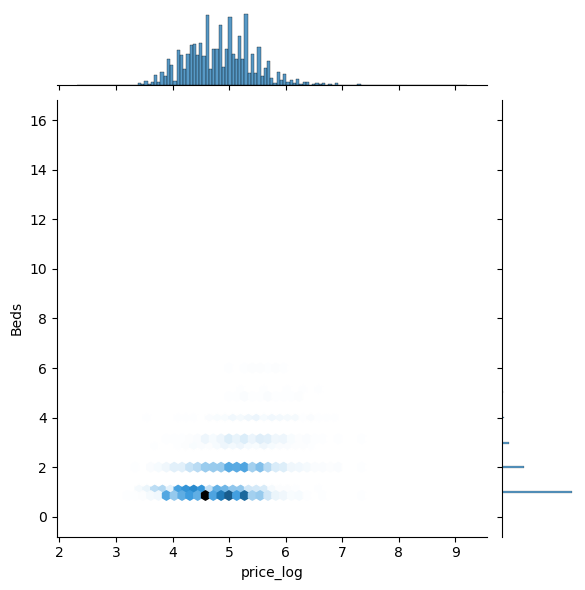

In [107]:
sns.jointplot(data=dfa, x='price_log', y='Beds', kind='hex')
# nearly all of the properties have 1-4 beds, and their price_log is between 3.8-6.2
# shows that because there are soooo many values, a scatterplot gets overwhelming to look at when considering all the data there is
#       this shows concentration and where the majority of the data is, not just all of the overlapping points
# shows the other plots really weren't that useful

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.